In [4]:
# import statements (importing important packages)
import tensorflow as tf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 100, 200) 
y = np.linspace(0, 100, 200) 

# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 200) 
y += np.random.uniform(-16, 16, 200) 

n = len(x) # Number of data points 



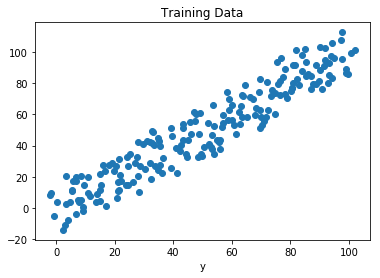

In [6]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 


In [7]:
# Taking X and Y as placeholders for training data

X = tf.placeholder("float") 
Y = tf.placeholder("float") 


In [8]:
# w is for weight and b is for bias

W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 


In [9]:
# initializing values for learning rate and defining number of epochs to be run

learning_rate = 0.01
training_epochs = 1000


In [10]:
# predicting value for X as per weight 'w' and bias 'b'
y_pred = tf.add(tf.multiply(X, W), b) 

# Mean Squared Error Cost Function ( calculating cost) 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 

# Gradient Descent Optimizer (optimizing weight and bias to best fit the dataset)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

# Global Variables Initializer (to initialize the global variables all together)
init = tf.global_variables_initializer() 


In [11]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 

    # Initializing the Variables 
    sess.run(init) 

    # Iterating through all the epochs 
    for epoch in range(training_epochs): 

        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 

        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 

    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 


Epoch 50 : cost = 56.033745 W = 0.88089824 b = 2.2113626
Epoch 100 : cost = 56.012993 W = 0.88054955 b = 2.2459536
Epoch 150 : cost = 55.99412 W = 0.8802268 b = 2.2779737
Epoch 200 : cost = 55.976967 W = 0.8799282 b = 2.3075984
Epoch 250 : cost = 55.96135 W = 0.87965184 b = 2.3350172
Epoch 300 : cost = 55.94716 W = 0.8793967 b = 2.360326
Epoch 350 : cost = 55.93422 W = 0.8791607 b = 2.3837388
Epoch 400 : cost = 55.92241 W = 0.8789427 b = 2.4053626
Epoch 450 : cost = 55.91164 W = 0.8787407 b = 2.4253967
Epoch 500 : cost = 55.90174 W = 0.8785534 b = 2.4439886
Epoch 550 : cost = 55.892685 W = 0.87838006 b = 2.4611819
Epoch 600 : cost = 55.884422 W = 0.87822026 b = 2.4770386
Epoch 650 : cost = 55.876873 W = 0.87807286 b = 2.4916623
Epoch 700 : cost = 55.869934 W = 0.8779359 b = 2.505246
Epoch 750 : cost = 55.863594 W = 0.8778096 b = 2.5177784
Epoch 800 : cost = 55.857788 W = 0.8776933 b = 2.5293148
Epoch 850 : cost = 55.85246 W = 0.8775859 b = 2.5399737
Epoch 900 : cost = 55.847576 W = 0.8

In [13]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 


Training cost = 55.838913 Weight = 0.8773091 bias = 2.5674326 



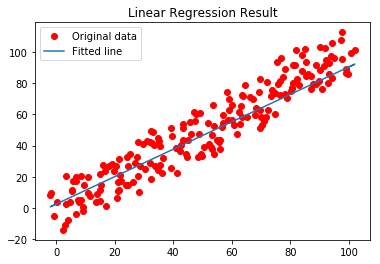

In [14]:
# Plotting the Results 
plt.plot(x, y,'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 
